Step 1: Install Required Libraries

In [4]:
# Install required libraries (Run this only once in Colab)
!pip install xgboost joblib

Step 2: Import Essential Libraries

In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Step 3: Load and Inspect Dataset

In [6]:
# Load dataset
file_path = "/content/CESAW_Project_Summary.csv"
data = pd.read_csv(file_path)

# Display dataset overview
print(" Dataset Preview:")
print(data.head())

# Check for missing values
print("\n Missing Values Summary:")
print(data.isnull().sum())

 Dataset Preview:
  Project_ID  Team_Size  Task_Count  Developer_Experience  Priority_Level  \
0        P-1          9          90                     4               1   
1        P-2         17         277                     1               2   
2        P-3         13         241                     4               2   
3        P-4         10         204                     7               3   
4        P-5          9         295                     4               2   

   Task_Complexity  Effort_Hours  Project_Size  Testing_Coverage  \
0             1.00          3039         63478              0.99   
1             1.54          4459         31762              0.78   
2             1.43          5000        149355              0.63   
3             1.60          5000        199994              0.72   
4             1.92          4760        175492              0.80   

   Past_Effort_Data  ... Task_Actual_Time_Minutes Phase_Key  Team_Key  \
0              3081  ...             

Step 4: Handle Missing Values

In [7]:
# Drop rows with missing values
data.dropna(inplace=True)
print(f"\n Missing values removed! Remaining data size: {data.shape}")


 Missing values removed! Remaining data size: (500, 23)


Step 5: Select Relevant Features

In [8]:
# Define selected features based on correlation analysis
selected_features = [
    "Team_Size", "Task_Count", "Developer_Experience", "Priority_Level",
    "Task_Complexity", "Project_Size", "Testing_Coverage",
    "Effort_Density", "Team_Productivity", "LoC_per_Team_Member"
]

# Define target variable
X = data[selected_features]
y = data["Duration_Days"]

print(f"\n Selected Features: {selected_features}")
print(f" Target Variable: Duration_Days")



 Selected Features: ['Team_Size', 'Task_Count', 'Developer_Experience', 'Priority_Level', 'Task_Complexity', 'Project_Size', 'Testing_Coverage', 'Effort_Density', 'Team_Productivity', 'LoC_per_Team_Member']
 Target Variable: Duration_Days


Step 6: Apply Feature Scaling

Standardizes feature values to improve model performance and stability.

RobustScaler - Handles outliers better than StandardScaler.

In [9]:
# Initialize RobustScaler
scaler = RobustScaler()

# Apply scaling to features
X_scaled = scaler.fit_transform(X)

print("\n Features Scaled Successfully!")


 Features Scaled Successfully!


Step 7: Split Dataset into Training & Testing Sets

Divide data into 80% training and 20% testing for model validation.

In [10]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"\n Data Split: {X_train.shape[0]} training rows, {X_test.shape[0]} testing rows")


 Data Split: 400 training rows, 100 testing rows


Step 8: Define Base Models for Stacking

Uses multiple models (Random Forest, XGBoost, Gradient Boosting) to improve predictions.

Previously, it was a simple model. Now, it is an ensemble learning model.

In [11]:
# Define base models with optimized hyperparameters
base_models = [
    ('rf', RandomForestRegressor(n_estimators=30, max_depth=8, min_samples_split=10, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=30, max_depth=5, learning_rate=0.05, gamma=0.1, reg_lambda=2.0, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=30, learning_rate=0.05, max_depth=3, random_state=42))
]

print("\n Base Models Defined for Stacking")


 Base Models Defined for Stacking


Step 9: Define Meta-Model (ElasticNet for Regularization)
Uses ElasticNet, which balances L1 & L2 regularization to prevent overfitting.

In [12]:
# Define meta-model (ElasticNet to reduce overfitting)
meta_model = ElasticNet(alpha=0.5, l1_ratio=0.5)  # Balanced L1/L2 regularization

print("\n Meta-Model (ElasticNet) Initialized")


 Meta-Model (ElasticNet) Initialized


Step 10: Create Stacking Model with Cross-Validation
Combines multiple models and meta-model for better accuracy.

In [13]:
# Define stacking model with cross-validation
stacked_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=StratifiedKFold(n_splits=5))

print("\n Stacking Model Created with Cross-Validation")


 Stacking Model Created with Cross-Validation


Step 11: Train the Hybrid Model

To fit the stacked model on training data.

In [14]:
print("\n Training the Stacking Model...")
stacked_model.fit(X_train, y_train)

print("\n Model Training Completed!")


 Training the Stacking Model...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



 Model Training Completed!


Step 12: Evaluate Model Performance

In [15]:
# Make predictions on the test set
y_pred = stacked_model.predict(X_test)

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n Final Optimized Stacking Model Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


 Final Optimized Stacking Model Evaluation:
MAE: 12.19
MSE: 251.24
RMSE: 15.85
R² Score: 0.93


Step 13: Save the Model and Preprocessing Tools

In [16]:
# Save trained stacking model & scaler
joblib.dump(stacked_model, "best_optimized_hybrid_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("\n Optimized hybrid model and scaler saved!")


 Optimized hybrid model and scaler saved!


Step 14: Store and Save Model Performance Metrics

In [17]:
# Store all regression metrics in a dictionary
timeline_metrics = {
    "r2_score": round(r2, 4),
    "mae": round(mae, 2),
    "rmse": round(rmse, 2)
}

# Save the metrics
joblib.dump(timeline_metrics, "project_timeline_metrics.pkl")

print(" Project Timeline Metrics saved!")

 Project Timeline Metrics saved!


Step 15: Visualize Model Performance

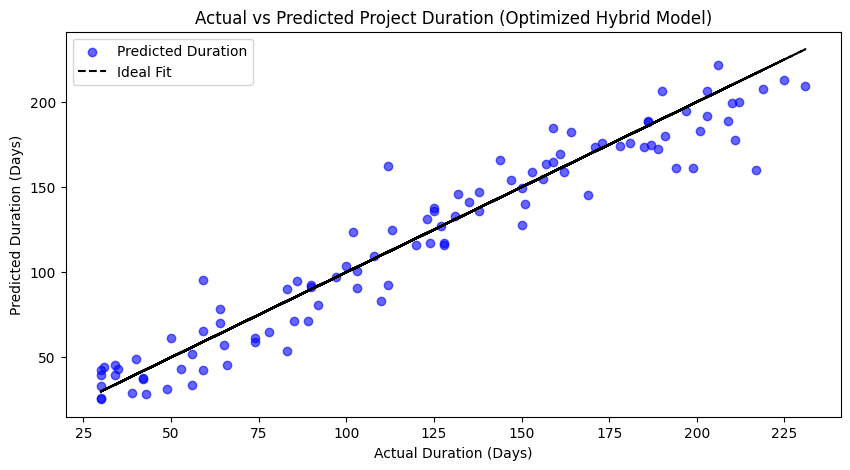


 Model Performance Visualization Completed!


In [18]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, label="Predicted Duration", alpha=0.6, color='blue')
plt.plot(y_test, y_test, 'k--', label="Ideal Fit")
plt.xlabel("Actual Duration (Days)")
plt.ylabel("Predicted Duration (Days)")
plt.legend()
plt.title("Actual vs Predicted Project Duration (Optimized Hybrid Model)")
plt.show()

print("\n Model Performance Visualization Completed!")